In [ ]:
from kedro_datasets.pandas import ParquetDataset
import pandas as pd

#kobe_raw_dev = catalog.load(name='kobe_raw_dev@parquet')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
dataset = ParquetDataset(filepath='../data/01_raw/dataset_kobe_dev.parquet').load()

In [ ]:
dataset = dataset.drop(columns=['action_type','combined_shot_type','game_event_id','game_id','loc_x','loc_y','season','seconds_remaining','shot_type','shot_zone_area','shot_zone_basic','shot_zone_range','team_id','team_name','game_date','matchup','opponent','shot_id'])

In [ ]:
dataset.info()

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.info()

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.head()


In [ ]:
from pycaret.classification import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
experiment = ClassificationExperiment()
experiment.setup(
    data=dataset, 
    target='shot_made_flag', 
    log_experiment='mlflow',
    experiment_name='kobe_pycarret',
    #log_profile=True,
    #log_data=True,
    #normalize=True,
    #normalize_method='robust',
    #polynomial_features=True,
    #feature_selection=True,
    #remove_multicollinearity=True,
    #pca=True,
)

In [ ]:
experiment.get_metrics()

In [ ]:
best = experiment.compare_models(n_select=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5437,0.5243,0.5894,0.5189,0.5519,0.0908,0.0916
1,0.5500,0.5289,0.6032,0.5250,0.5614,0.1039,0.1050
2,0.5282,0.5116,0.5988,0.5050,0.5479,0.0619,0.0629
3,0.5359,0.5158,0.5649,0.5127,0.5375,0.0740,0.0744
4,0.5549,0.5424,0.6239,0.5288,0.5724,0.1149,0.1166
5,0.5500,0.5430,0.5870,0.5258,0.5547,0.1027,0.1033
6,0.5444,0.5230,0.5782,0.5206,0.5479,0.0912,0.0917
7,0.5359,0.5184,0.6062,0.5118,0.5550,0.0773,0.0785
8,0.5556,0.5298,0.6091,0.5302,0.5669,0.1151,0.1163


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5542,0.5570,0.5081,0.5342,0.5208,0.1046,0.1047
1,0.5697,0.5832,0.5192,0.5526,0.5354,0.1354,0.1357
2,0.5634,0.5674,0.4985,0.5469,0.5216,0.1216,0.1221
3,0.5507,0.5553,0.5059,0.5310,0.5181,0.0977,0.0978
4,0.5437,0.5444,0.5147,0.5225,0.5186,0.0849,0.0849
5,0.5592,0.5687,0.5398,0.5382,0.5390,0.1166,0.1166
6,0.5549,0.5586,0.4897,0.5372,0.5123,0.1046,0.1050
7,0.5408,0.5480,0.5221,0.5191,0.5206,0.0801,0.0801
8,0.5606,0.5698,0.5531,0.5388,0.5459,0.1203,0.1204


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


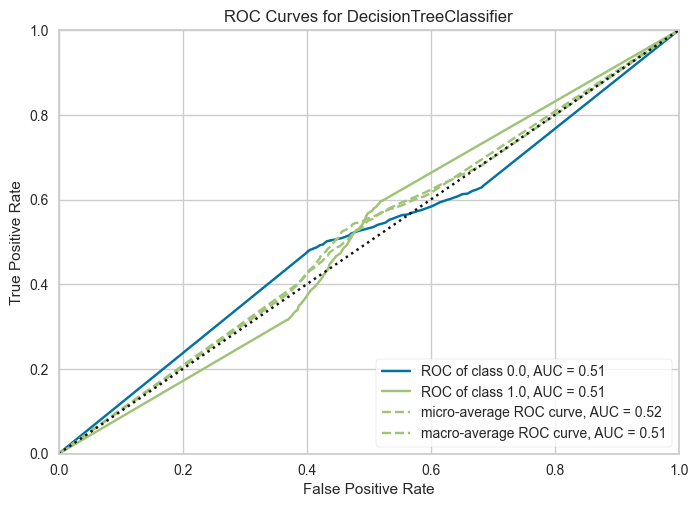

In [23]:
#scikit-learn, scikit-optimize, tune-sklearn, optuna
model_1 = experiment.tune_model(
        experiment.create_model('dt'),
        optimize='F1',
        n_iter=10,
        search_library='scikit-optimize',
    )
experiment.plot_model(model_1, plot = 'auc')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5690,0.5912,0.4904,0.5543,0.5204,0.1317,0.1325
1,0.5697,0.5769,0.4499,0.5617,0.4996,0.1302,0.1327
2,0.5648,0.5809,0.4882,0.5498,0.5172,0.1236,0.1243
3,0.5859,0.5966,0.4808,0.5801,0.5258,0.1640,0.1663
4,0.5725,0.5897,0.4764,0.5617,0.5156,0.1377,0.1392
5,0.5711,0.5844,0.4779,0.5596,0.5155,0.1351,0.1364
6,0.5718,0.6006,0.4499,0.5648,0.5008,0.1343,0.1370
7,0.5831,0.5981,0.4985,0.5729,0.5331,0.1598,0.1611
8,0.6000,0.6214,0.5147,0.5935,0.5513,0.1938,0.1954


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5718,0.5914,0.5569,0.5504,0.5536,0.1423,0.1423
1,0.5620,0.5770,0.4985,0.5452,0.5208,0.1189,0.1193
2,0.5549,0.5810,0.5369,0.5337,0.5353,0.1083,0.1083
3,0.5803,0.5966,0.5265,0.5649,0.5450,0.1564,0.1567
4,0.5732,0.5899,0.5369,0.5549,0.5457,0.1435,0.1436
5,0.5606,0.5843,0.5295,0.5407,0.5350,0.1186,0.1186
6,0.5704,0.6007,0.5015,0.5556,0.5271,0.1355,0.1361
7,0.5732,0.5984,0.5575,0.5526,0.5551,0.1451,0.1451
8,0.5923,0.6212,0.5649,0.5742,0.5695,0.1823,0.1823


Fitting 10 folds for each of 10 candidates, totalling 100 fits


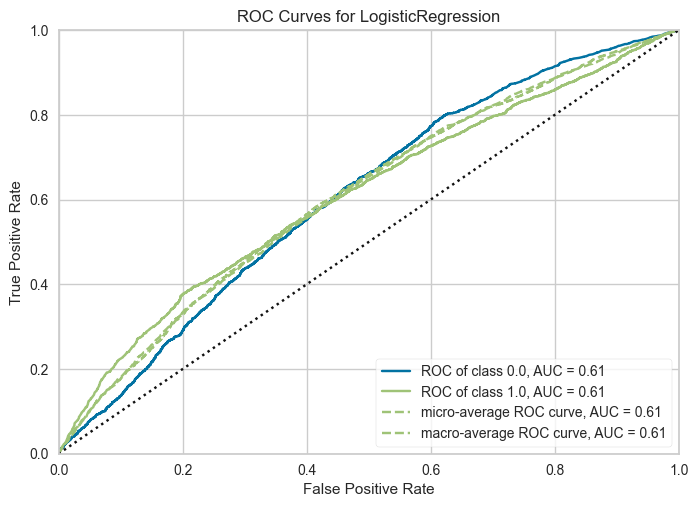

In [24]:
model_2 = experiment.tune_model(
    experiment.create_model('lr'),
    optimize='F1',
    n_iter=10,
    search_library='scikit-learn',
)
experiment.plot_model(model_2, plot = 'auc')

In [ ]:
experiment.evaluate_model(best)

In [ ]:
import pickle

with open('model.pkl', 'wb') as fout:
    pickle.dump(best, fout)

In [ ]:
#experiment.plot_model(best, plot = 'residuals_interactive')

In [ ]:
experiment.plot_model(best, plot = 'feature')

In [ ]:
final_best = experiment.finalize_model(best)

In [ ]:
final_best